In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
# importing loan_dataset

loan_data = pd.read_csv('loan_data.csv')

In [23]:
# understanding data 
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [24]:
# data statistics 
loan_data.describe()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.108333,0.691667
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.822906,0.462287
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


# Cleaning Data


In [25]:
# NULL values
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
# NULL value can cause problem while trainig the model HEnce DROP those entries/rows

loan_data = loan_data.dropna()

In [27]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualizing Data

<AxesSubplot:xlabel='Education', ylabel='count'>

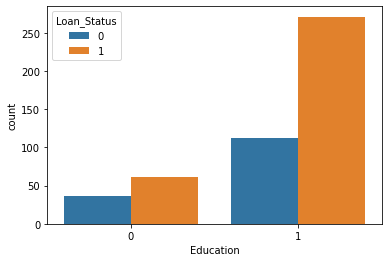

In [28]:
# Visulalizing loan_data using seaborn

sns.countplot(x= "Education" , hue = "Loan_Status",data = loan_data)

# using the visual we van conclude there is high corelation between education and loan status

<AxesSubplot:xlabel='Married', ylabel='count'>

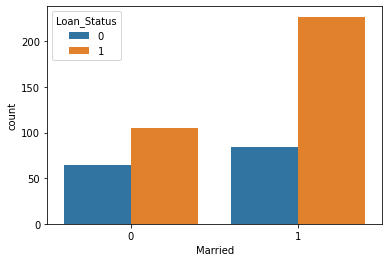

In [29]:
sns.countplot(x= "Married" , hue = "Loan_Status",data = loan_data)
# using the visual we van conclude there is high corelation between Martial status and loan status

# Label Encoding

---




In [30]:
# since we will feed this loan_data to computer for processing we need to change string values of columns to appropriate integer we will use technique called " Label Encoding" 
# Firstly , we need to know how many types of values a Catrgorical value column(which has strings) contains
loan_data['Married'].value_counts()


1    311
0    169
Name: Married, dtype: int64

In [32]:
# loan_data.replace({"Education" : {"Graduate" : 1 , "Not Graduate" : 0}}, inplace = True)
# loan_data.replace({"Self_Employed" : {"Yes" : 1 , "No" : 0}}, inplace = True)
# loan_data.replace({"Property_Area" : {"Urban" : 1 , "Rural" : 0 , "Semiurban":2}}, inplace = True)
# loan_data.replace({"Loan_Status" : {"Y" : 1 , "N" : 0}}, inplace = True)
# loan_data.replace({"Gender" : {"Male" : 1 , "Female" : 0}}, inplace = True)
# loan_data.replace({"Married" : {'Yes' : 1 , 'No' : 0 } }, inplace = True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [33]:
loan_data["Dependents"].value_counts()

# Here 3+ is sa string and not a  integer like other values of "dependents"

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [35]:
# Converting 3+ to something that could be processed
loan_data.replace({"Dependents" : {"3+" :4}}, inplace =True)

In [36]:
# Succesfully completed Label Encoding
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


# Building Machine Learning Model


In [37]:
# splitting data into feature that to be learnt and output

X = loan_data.drop(columns = ['Loan_ID' , 'Loan_Status' ], axis=1)
Y = loan_data["Loan_Status"]

In [38]:
# SPliting data into training data and test data 

X_train,X_test,Y_train,Y_test = train_test_split(X , Y ,test_size = 0.1,stratify=Y,random_state = 2)

# Training Model

In [39]:
# initializing a classifier

classifier = svm.SVC(kernel = "linear")

In [40]:
classifier.fit(X_train , Y_train)

SVC(kernel='linear')

In [41]:
# Getting accuracy for training set

X_train_pred  = classifier.predict(X_train)
training_accuracy = accuracy_score(X_train_pred , Y_train)
print(training_accuracy)

0.7708333333333334


In [42]:
# Predicting for test set and then checking accuracy

X_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(X_test_pred , Y_test)
print(test_accuracy)


0.8125
